In [2]:
# Load the "autoreload" extension
%reload_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

import os
import sys

# add the 'src' directory as one where we can import modules
src_dir = os.path.join(os.getcwd(), os.pardir, os.pardir, 'src')
sys.path.append(src_dir)

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import time
from functional import seq

https://poloniex.com/public?command=returnChartData&currencyPair=USDT_BTC&start=1504154759&end=1504244759&period=300


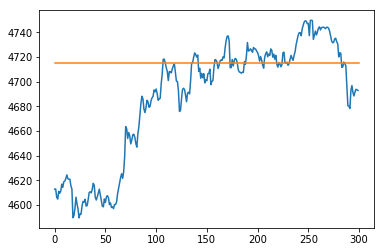

4715.392921792728

In [92]:
periods = 300
current_time = int(time.time())

data = fetch_prices('USDT_BTC', current_time - periods*300, current_time)
df = seq(data).to_pandas()
df

max_price = df['weightedAverage'].max()
min_price = df['weightedAverage'].min()

df['bin'] = ((df['weightedAverage'] - min_price) / (max_price - min_price) * 100).astype('int')
agg = df.groupby('bin')['open','date']
agg = agg.agg({'open': np.mean, 'date': lambda x: np.sum((x/100)**2) * x.size})


plt.plot(df['weightedAverage'])

congestion = agg[agg['date'] == agg['date'].max()]
price = congestion['open'].values[0]

plt.plot([0, periods], [price, price])
plt.show()
price